# Import Libraries and Load Data

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

nltk.download('stopwords')

df = pd.read_csv("Spam_SMS.csv")

print("First few rows of the dataset:")
display(df.head())

print("Checking for missing values in the dataset:")
display(df.isnull().sum())


First few rows of the dataset:


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Checking for missing values in the dataset:


,0
Class,0
Message,0


# SMS Spam Detection with Naive Bayes

### 1. Import Libraries and Load Data
- We import necessary libraries like `pandas` for data handling, `sklearn` for model training, and `nltk` for text preprocessing.
- The dataset is loaded using `pandas.read_csv()` and we display the first few rows to understand its structure.
- Missing values are checked to ensure data quality.


---



# Data Preprocessing

In [18]:
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['Processed_Message'] = df['Message'].apply(preprocess_text)


### 2. Data Preprocessing
- A preprocessing function is created to clean the text.
    - Convert all text to lowercase.
    - Remove punctuation marks.
    - Eliminate common stopwords (words like "the", "is", etc.) using `nltk.corpus.stopwords`.
- This preprocessing is applied to each message and saved in a new column `Processed_Message`.




---



# Generate WordClouds for Spam and Ham Messages

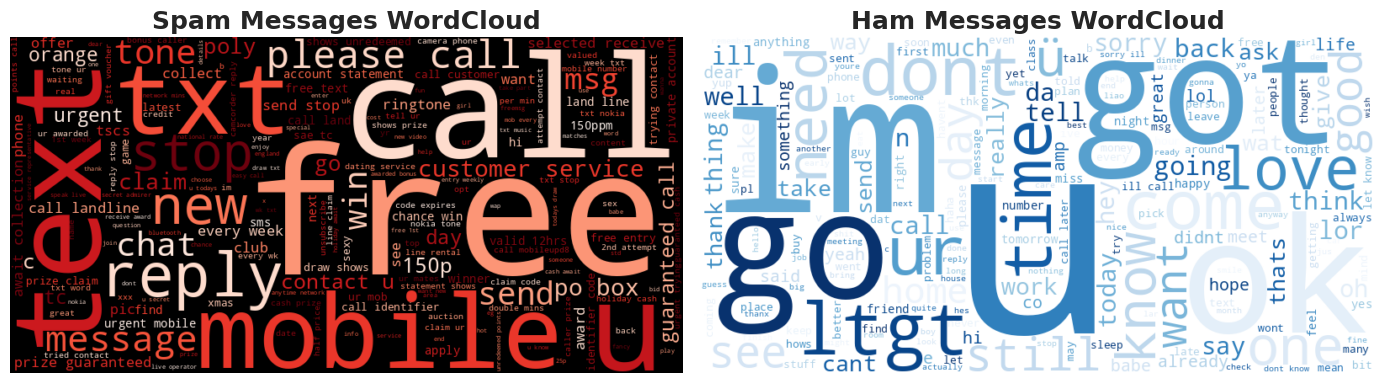

In [17]:
spam_words = ' '.join(df[df['Class'] == 'spam']['Processed_Message'])
ham_words = ' '.join(df[df['Class'] == 'ham']['Processed_Message'])

spam_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(spam_words)

ham_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(ham_words)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title("Spam Messages WordCloud", fontsize=18, weight='bold')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title("Ham Messages WordCloud", fontsize=18, weight='bold')
plt.axis('off')

plt.tight_layout()
plt.show()




---



# Model Training and Evaluation

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    df['Processed_Message'],
    df['Class'],
    test_size=0.2,
    random_state=42
)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['ham', 'spam'])

print("\nModel Evaluation:")
print("="*40)
print(f"Accuracy of the model: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_rep)

from IPython.display import display, Markdown

accuracy_text = f"### Model Accuracy: {accuracy:.2%}"
classification_text = f"### Classification Report:\n```\n{classification_rep}\n```"

display(Markdown(accuracy_text))
display(Markdown(classification_text))



Model Evaluation:
Accuracy of the model: 0.97

Classification Report:

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       954
        spam       1.00      0.78      0.87       161

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



### Model Accuracy: 96.77%

### Classification Report:
```
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       954
        spam       1.00      0.78      0.87       161

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

```

### 4. Model Training and Evaluation
- The dataset is split into **train** (80%) and **test** (20%) sets using `train_test_split`.
- Text data is converted into TF-IDF vectors, which transform the raw text into numerical form for model training.
- A **Naive Bayes Classifier** is used to train on the training set, as it works well with text classification.
- We evaluate the model on the test set, and display the **accuracy** and **classification report** (precision, recall, f1-score) using Markdown for clear presentation in Jupyter.
